## Cayley transform

$$
C(A) = (I-A) (I+A)^{-1}
$$

where $A$ is skew-symmetric.

https://en.wikipedia.org/wiki/Cayley_transform

## Example

$$
A =\begin{bmatrix} 0 & \tan \frac{\theta}{2} \\ -\tan \frac{\theta}{2} & 0 \end{bmatrix}
\leftrightarrow
C(A)=\begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix} .
$$

In [1]:
import numpy as np
from scipy.linalg import inv

def cayley_transform(A):
    """
    Compute the Cayley transform of a square matrix A: (I - A)(I + A)^{-1}
    """
    I = np.eye(A.shape[0])  
    return (I - A) @ inv(I + A)

def compute_rotation_matrix(theta):
    R = np.array([[np.cos(theta), -np.sin(theta)],
                 [np.sin(theta), np.cos(theta)]])
    return R

# Define a 2x2 matrix
theta = np.pi /4
A = np.array([[0, np.tan(theta/2)],
              [-np.tan(theta/2), 0]])
R = compute_rotation_matrix(theta)

# Compute the Cayley transform of A
C = cayley_transform(A)

# Verify
is_equal = np.allclose(C, R)
if is_equal:
    print("C(A) is a rotation matrix.")
    
# Display the result
print("\ntheta: ")
print(theta)
print("\nOriginal matrix A:")
print(A)
print("\nCayley transform of A:")
print(C)

C(A) is a rotation matrix.

theta: 
0.7853981633974483

Original matrix A:
[[ 0.          0.41421356]
 [-0.41421356  0.        ]]

Cayley transform of A:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## Draw eigenvalues of C(A) 

$$
C(A) = (I-A) (I+A)^{-1}
$$

where $A$ is skew-symmetric.

- $\lambda(A) :=\mu \in \mathbf{C}$ is purely imaginary or zero.
- $\lambda(C(A)) = (1-\mu)/(1+\mu)  \in \mathbf{C} $

$\lambda(C(A))$ lie on the unit circle due to the Mobius transformation.

- https://en.wikipedia.org/wiki/M%C3%B6bius_transformation


The formula is correct:
lambda = (1 - mu)(1 + mu)

Eigenvalues of A (μ):
[ 1.11022302e-16+9.13377368j  1.11022302e-16-9.13377368j
  0.00000000e+00+5.67919131j  0.00000000e+00-5.67919131j
  0.00000000e+00+3.12873741j  0.00000000e+00-3.12873741j
 -2.22044605e-16+1.733844j   -2.22044605e-16-1.733844j
  3.19189120e-16+0.16047301j  3.19189120e-16-0.16047301j]

Eigenvalues of C (λ):
[-0.97631057-0.21637394j -0.97631057+0.21637394j -0.93985544-0.34157248j
 -0.93985544+0.34157248j -0.81462597-0.57998666j -0.81462597+0.57998666j
 -0.50077567-0.86557711j -0.50077567+0.86557711j  0.94978982-0.31288863j
  0.94978982+0.31288863j]


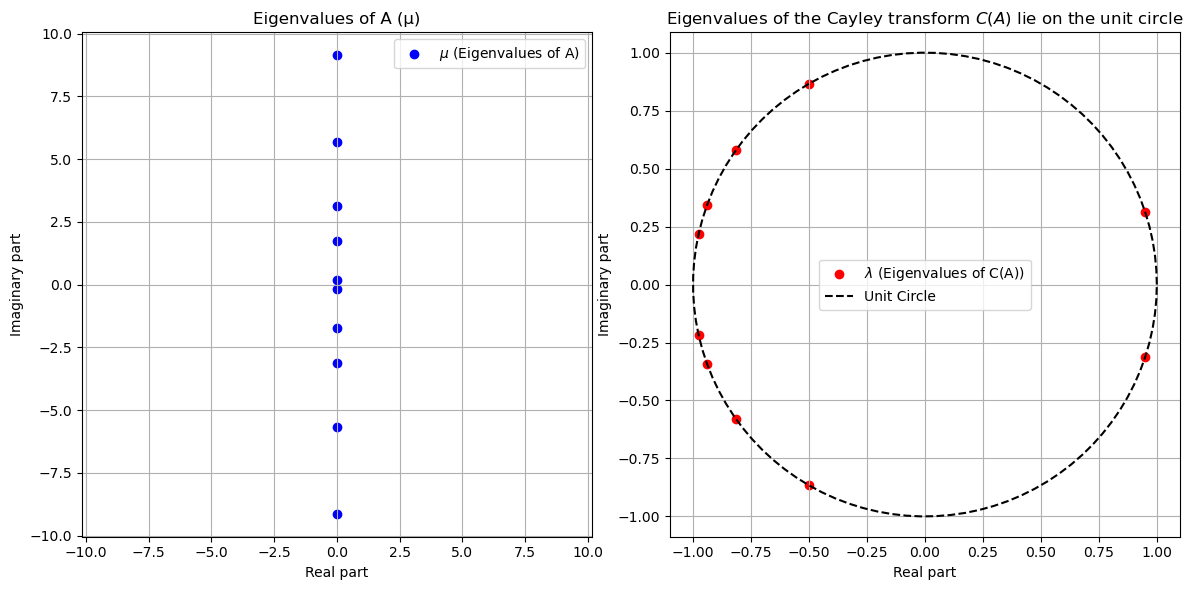

In [2]:
import numpy 
import matplotlib.pyplot as plt

n = 10
# Compute eigenvalues of A
A = np.random.randint(1, 9, size=(n,n))
A = (A - A.T)/2
eig_val_A, eig_vec_A = np.linalg.eig(A)

# Compute eigenvalues of C(A)
C = cayley_transform(A)
eig_val_C, eig_vec_C = np.linalg.eig(C)

# Verify the formula
guess_eig_val_C = np.array([(1 - m) / (1 + m) for m in eig_val_A])
eig_val_C.sort()
guess_eig_val_C.sort()
is_equal = np.allclose(eig_val_C, guess_eig_val_C)

if is_equal:
    print("The formula is correct:")
    print('lambda = (1 - mu)(1 + mu)')
else:
    print("The formula is incorrect.")

# Output results
print("\nEigenvalues of A (μ):")
print(eig_val_A)
print("\nEigenvalues of C (λ):")
print(eig_val_C)

# Create a 1x2 plot (scatter plot)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Left plot: Scatter plot of eigenvalues of A (μ)
axs[0].scatter(np.real(eig_val_A), np.imag(eig_val_A), color='blue', label=r'$\mu$ (Eigenvalues of A)')
axs[0].set_title("Eigenvalues of A (μ)")
axs[0].set_xlabel("Real part")
axs[0].set_ylabel("Imaginary part")
axs[0].grid(True)
axs[0].axis('equal')
axs[0].legend()

# Right plot: Scatter plot of eigenvalues of C (λ)
axs[1].scatter(np.real(eig_val_C), np.imag(eig_val_C), color='red', label=r'$\lambda$ (Eigenvalues of C(A))')

# Add the unit circle
theta = np.linspace(0, 2 * np.pi, 100)
x_unit_circle = np.cos(theta)
y_unit_circle = np.sin(theta)
axs[1].plot(x_unit_circle, y_unit_circle, color='black', label='Unit Circle', linestyle='--')

# Customize the plot
axs[1].set_title(r"Eigenvalues of the Cayley transform $C(A)$ lie on the unit circle")
axs[1].set_xlabel("Real part")
axs[1].set_ylabel("Imaginary part")
axs[1].grid(True)
axs[1].axis('equal')
axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()
